## 1. 로지스틱 회귀 개요
&nbsp;&nbsp;&nbsp;&nbsp;앞서 살펴본 선형회귀분석은 그 정의와 전제에서 알 수 있듯, 독립변수 x와 종속변수 y 사이에 선형 관계가 성립하면서 동시에 x와 y가 연속형 변수일 경우 유용하게 사용할 수 있습니다. 하지만 y가 연속형, 수치형 변수가 아닌 범주형 변수일 경우에는 어떨까요? 

&nbsp;&nbsp;&nbsp;&nbsp;y가 특정 값이 될 확률일 경우 선형회귀의 모델로는 설명이 쉽지 않아보입니다. 가령, 질병 발생여부처럼 양성(1)과 음성(0), 생존(1)과 사망(0)과 같은 중간 값이 없는 예측은 다른 방식의 예측 방법이 필요한데, 이를 위해 고안된 것이 로지스틱 회귀입니다. 이 경우 두 가지 결과로 나뉘는 사건에 대한 직접 예측 보단 사건이 발생할 확률을 예측한다고 하는 것이 더 정확할 것이며, 두 가지 값을 구분한다고 해서 이진분류(Binary Classification)라고 합니다.



## 2. 로지스틱 함수
&nbsp;&nbsp;&nbsp;&nbsp;위의 내용을 정리하자면, 선형회귀 모델로는 이진분류 문제를 예측할 수 없기 때문에 등장한 것이 로지스틱 회귀입니다. 로지스틱 회귀를 위해선 선형회귀 모델과는 달리 S자형 그래프가 필요하고, 이를 로지스틱 함수라고 합니다. 그렇다면 로지스틱 함수는 어떻게 구축하는 걸까요?

#### 로지스틱 함수
&nbsp;&nbsp;&nbsp;&nbsp;***참고 : 시그모이드 함수라는 용어는 일반적으로 S자형 곡선을 그리는 모든 함수를 가리키며, 로지스틱 함수가 그 대표적인 예입니다. 따라서 로지스틱 함수는 시그모이드 함수의 한 종류라고 할 수 있습니다.***

**오즈비(odds ratio) :** 로지스틱 함수를 구하기 위해선 우선 오즈비를 알아야합니다. 승산비라고도 하는 오즈비는 도박사들이 자주 쓰는 개념으로, 쉽게 말하면 실패확률 대비 성공확률입니다. 식은 다음과 같으며 P는 성공확률입니다(P는 0과 1 사이의 값).

$$
\text{odds ratio} = \frac{P}{1 - P}
$$

하지만 이를 바로 활용할 수는 없는데요. 위의 식을 통해 알 수 있듯, P가 증가함에 따라 오즈비가 기하급수적으로 증가하기 때문입니다. 그렇기 때문에 로그를 취해 증가를 완화시키고, 그에 따라 선형적인 그림을 나타내 선형회귀의 기본식을 활용할 수 있게 되면서 "로지스틱 회귀"라는 이름을 붙이게 되었습니다. 로그를 취한 오즈비, 즉 "로짓"을 x와 y의 위치를 교체하면 일반적인 로스스틱 회귀에서 사용하는 그래프 모양이 됩니다. 

$$
\text{log(odds ratio)} = \text{logit}\ = \log\left(\frac{P}{1 - P}\right)
$$


**로짓을 로지스틱함수로 바꾸기**

##### 2. Logit 함수의 반대 함수

Logit 함수의 결과를 \( z \)라고 하면:

$$
z = \log\left(\frac{p}{1 - p}\right)
$$

##### 3. 로지스틱 함수로 변환

위 식을 \( p \)에 대해 풀어 로지스틱 함수를 얻습니다:

1. 양변에 지수 함수를 취합니다:

   $$
   e^z = \frac{p}{1 - p}
   $$

2. 양변에 \( 1 - p \)를 곱합니다:

   $$
   e^z (1 - p) = p
   $$

3. 이를 \( p \)에 대해 정리합니다:

   $$
   e^z - e^z p = p
   $$

4. 모든 \( p \) 항을 한쪽으로 모읍니다:

   $$
   e^z = p + e^z p
   $$

5. 따라서:

   $$
   e^z = p (1 + e^z)
   $$

6. 양변을 \( 1 + e^z \)로 나누면:

   $$
   p = \frac{e^z}{1 + e^z}
   $$

이를 로지스틱 함수로 나타내면:

$$
p = \frac{1}{1 + e^{-z}}
$$

## 3. 로지스틱함수 특징
##### &nbsp;&nbsp;&nbsp;&nbsp;**1)출력범위 :** 출력 결과는 항상 0과 1 사이입니다. 이를 통해 특정 데이터가 이진분류 중 어디에 속할 확률을 알게 해줍니다.
##### &nbsp;&nbsp;&nbsp;&nbsp;**2)결정경계 :** 이진분류 중 어디에 속할지를 예측하는 기준으로 보통 0.5로 잡습니다.
##### &nbsp;&nbsp;&nbsp;&nbsp;**3)미분가능성 :** 로지스틱 함수는 모든 점에서 미분 가능하며, 경사하강법(Gradient Descent)과 같은 최적화 알고리즘을 통해 최적의 결정 경계를 찾을 수 있습니다.
##### &nbsp;&nbsp;&nbsp;&nbsp;**3)확률적해석 :** 이진 분류 결과를 평가하는 데 확실성의 정도를 제공합니다.



## 3. 캐글 코드 분석 및 실습
출처 : https://www.kaggle.com/code/amirhosseinzinati/diabetes-logistic-regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('C:/Users/neddy/Documents/GitHub/머신러닝학습/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#자료 통계 요약용 테이블 생성해서 확인

info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.insert(4,"Min",data.min(),True)
info.insert(5,"Max",data.max(),True)
info.T    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
IsNull,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
IsNa,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
Duplicate,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
Unique,17.0,136.0,47.0,51.0,186.0,248.0,517.000,52.0,2.0
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
Max,17.0,199.0,122.0,99.0,846.0,67.1,2.420,81.0,1.0


### 전처리

In [11]:
df = data.copy()

In [9]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

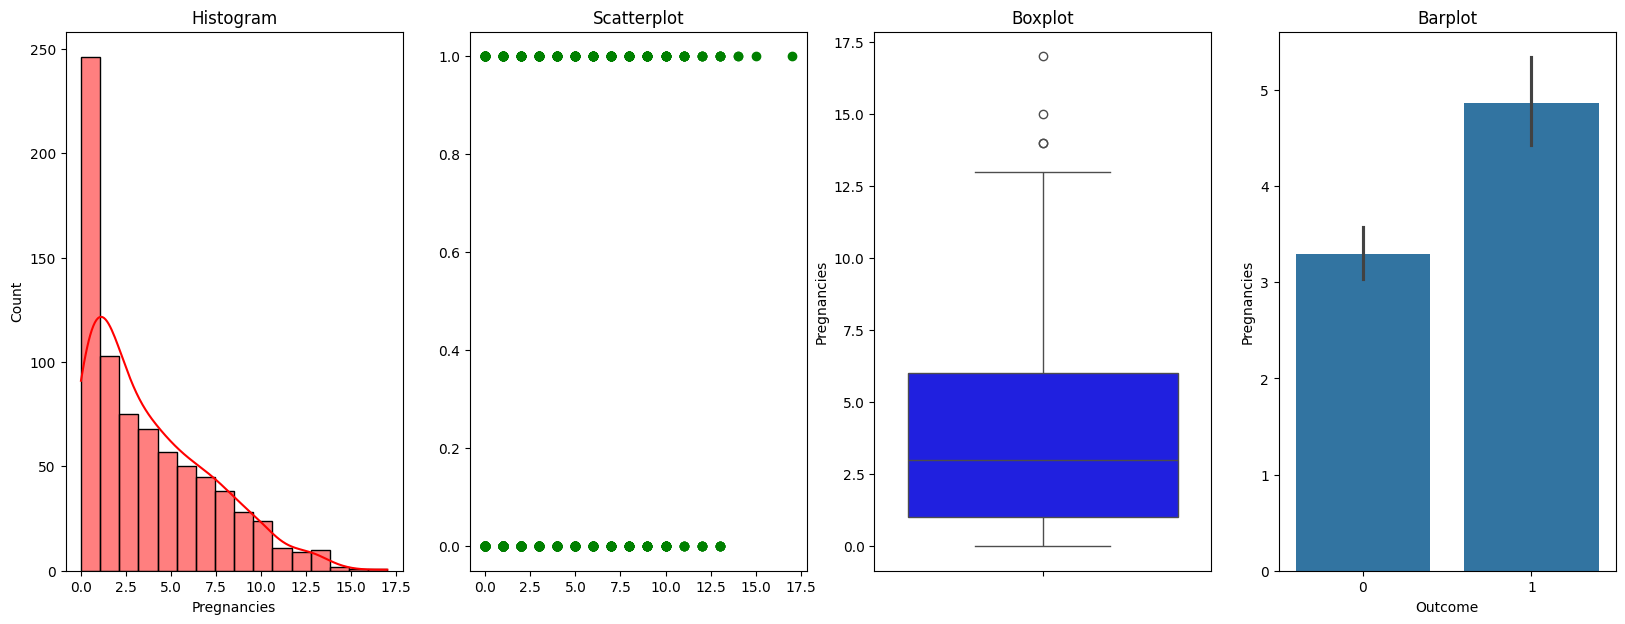

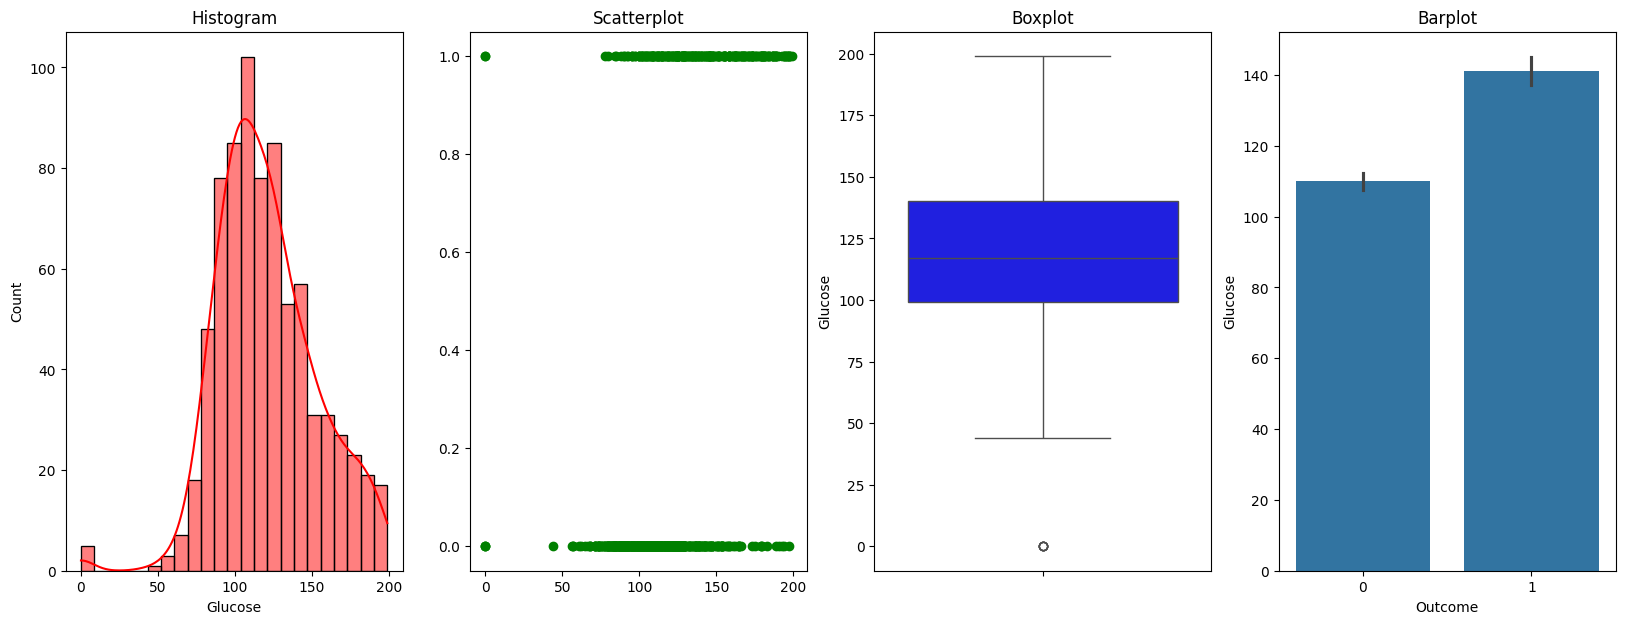

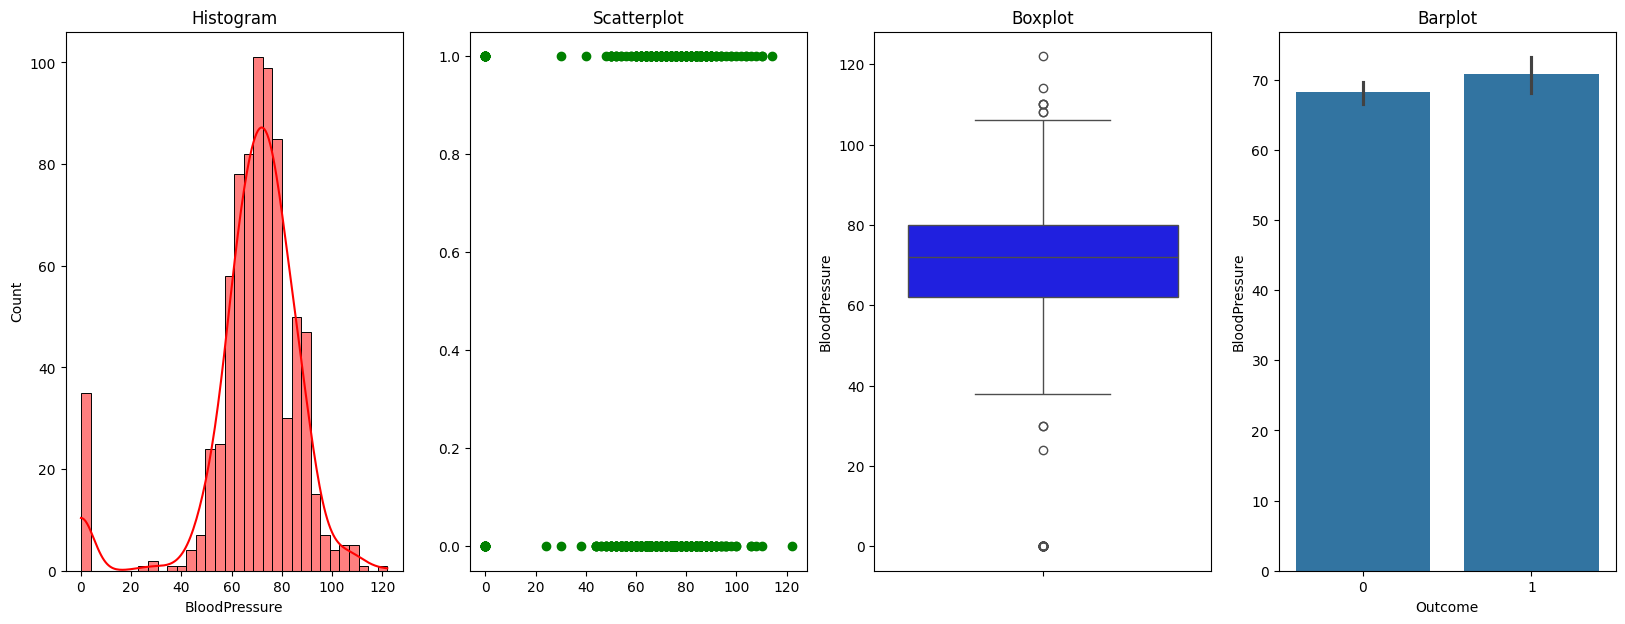

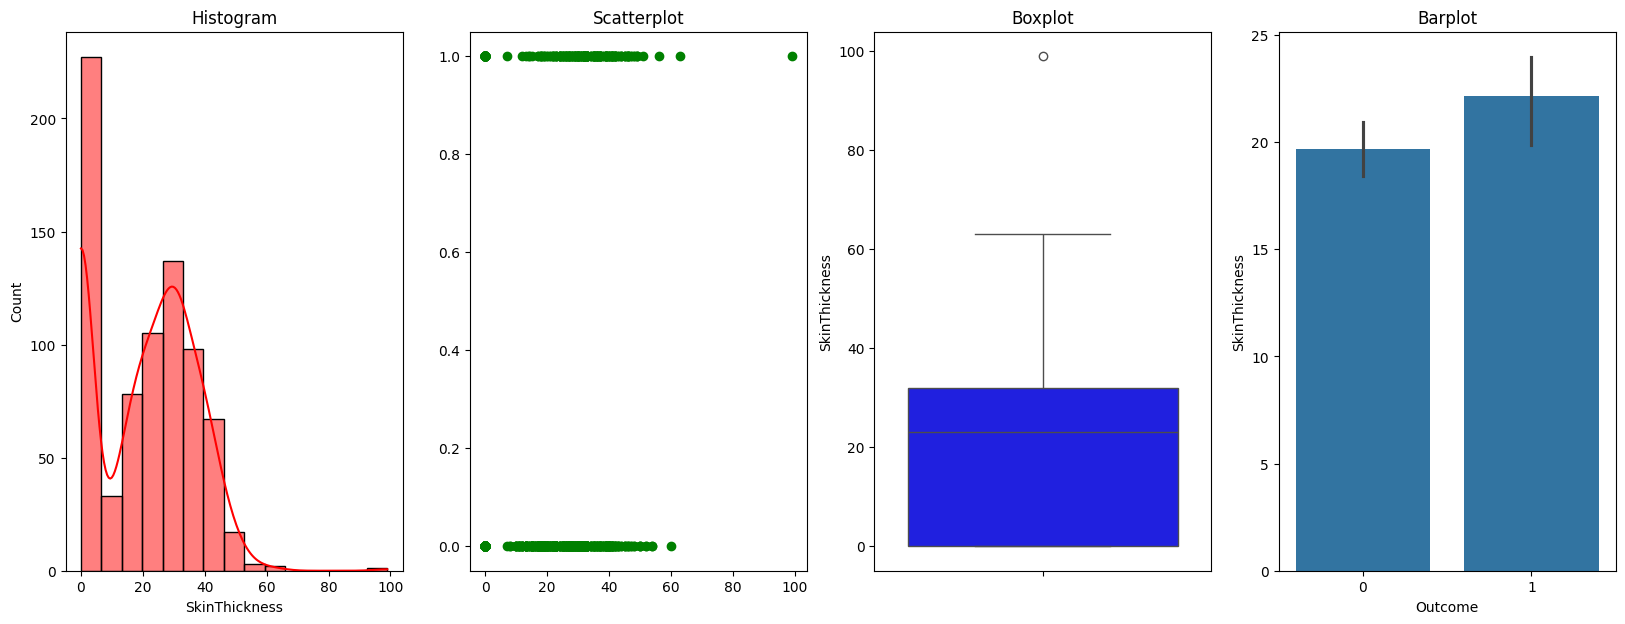

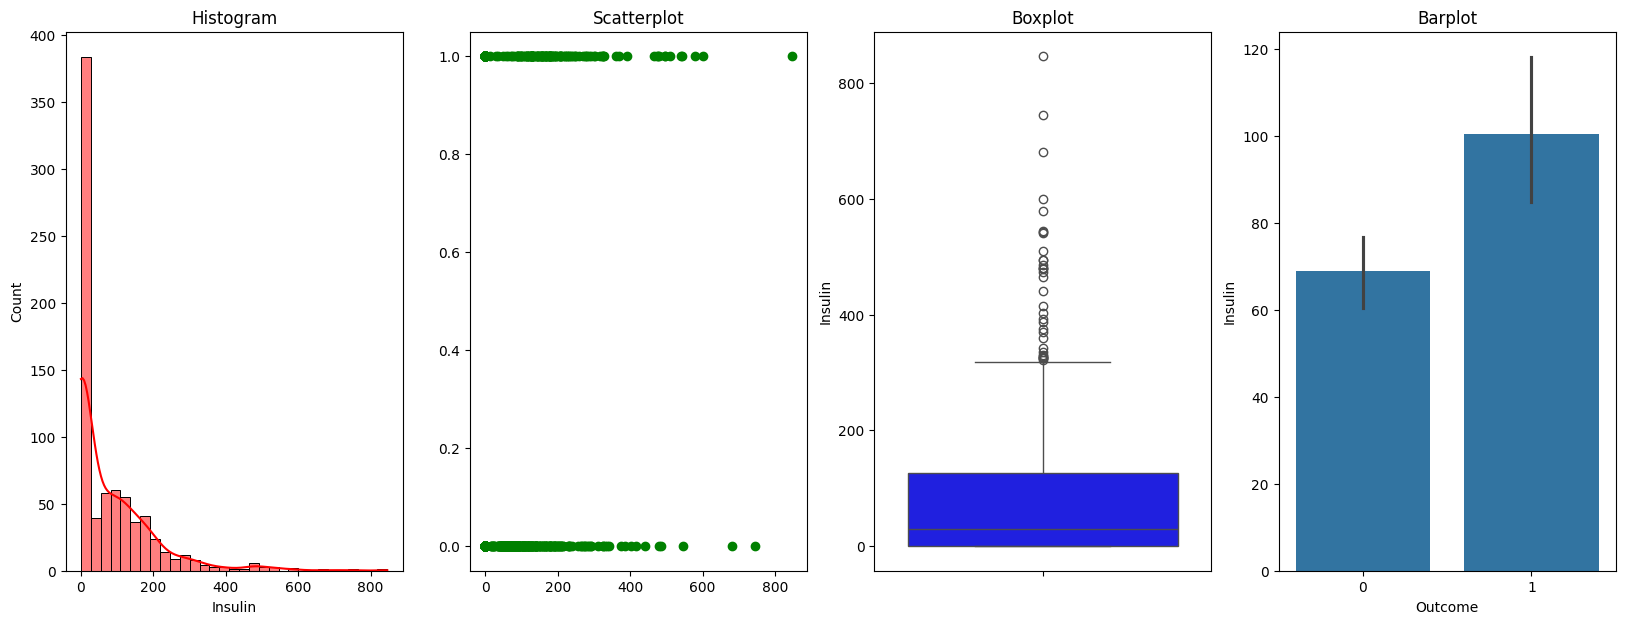

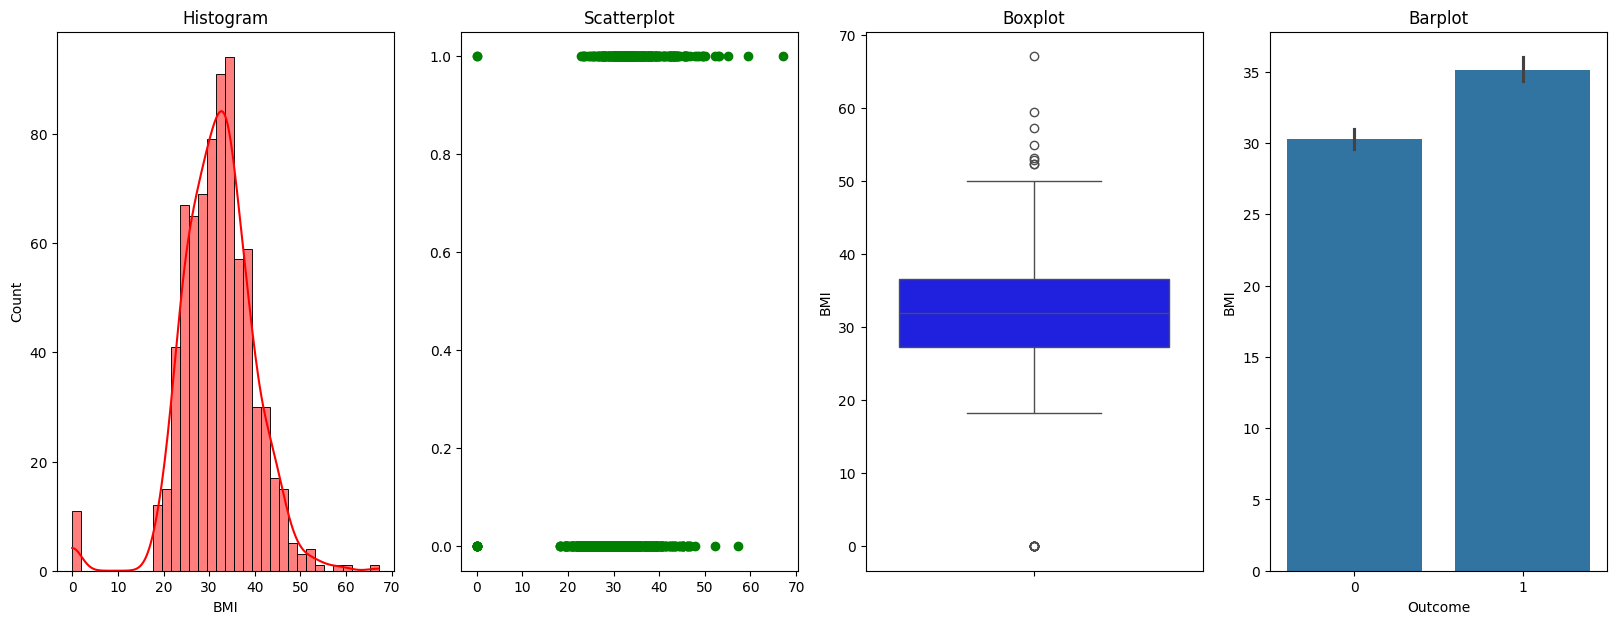

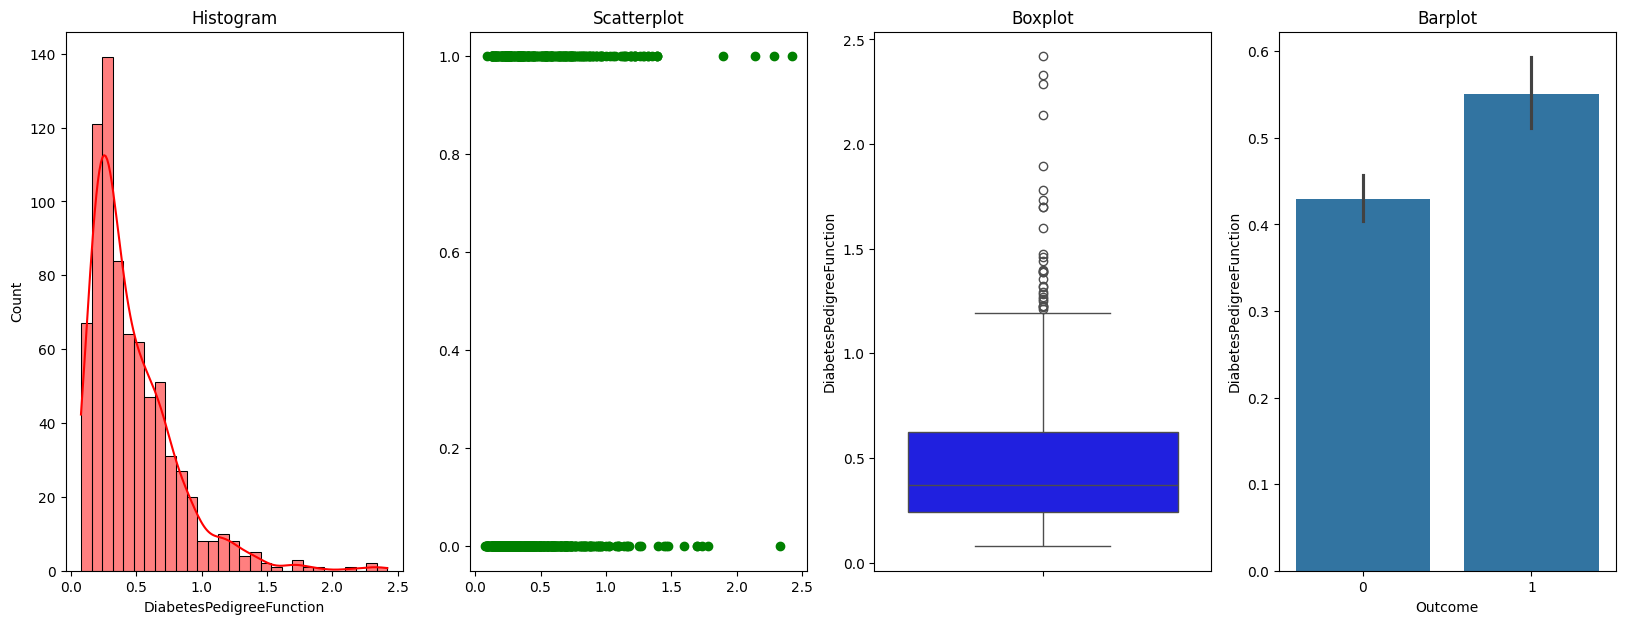

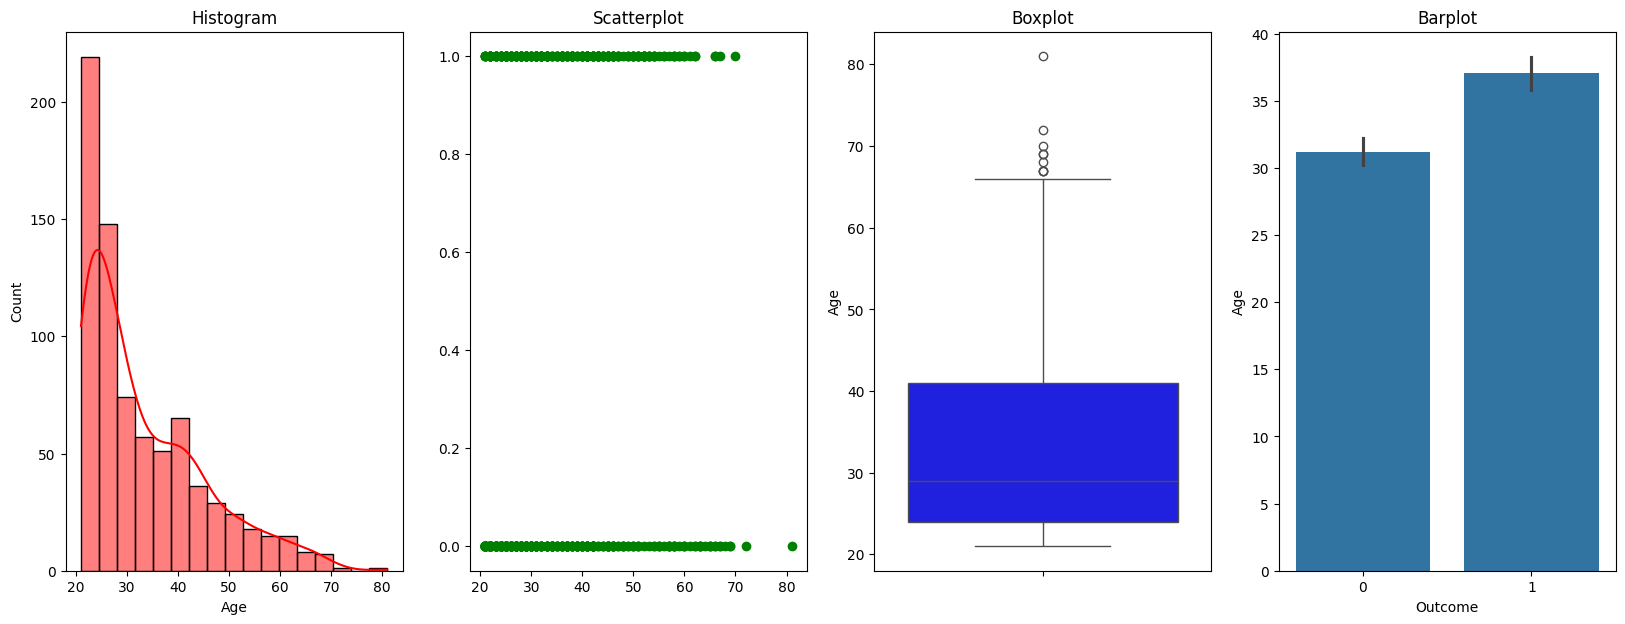

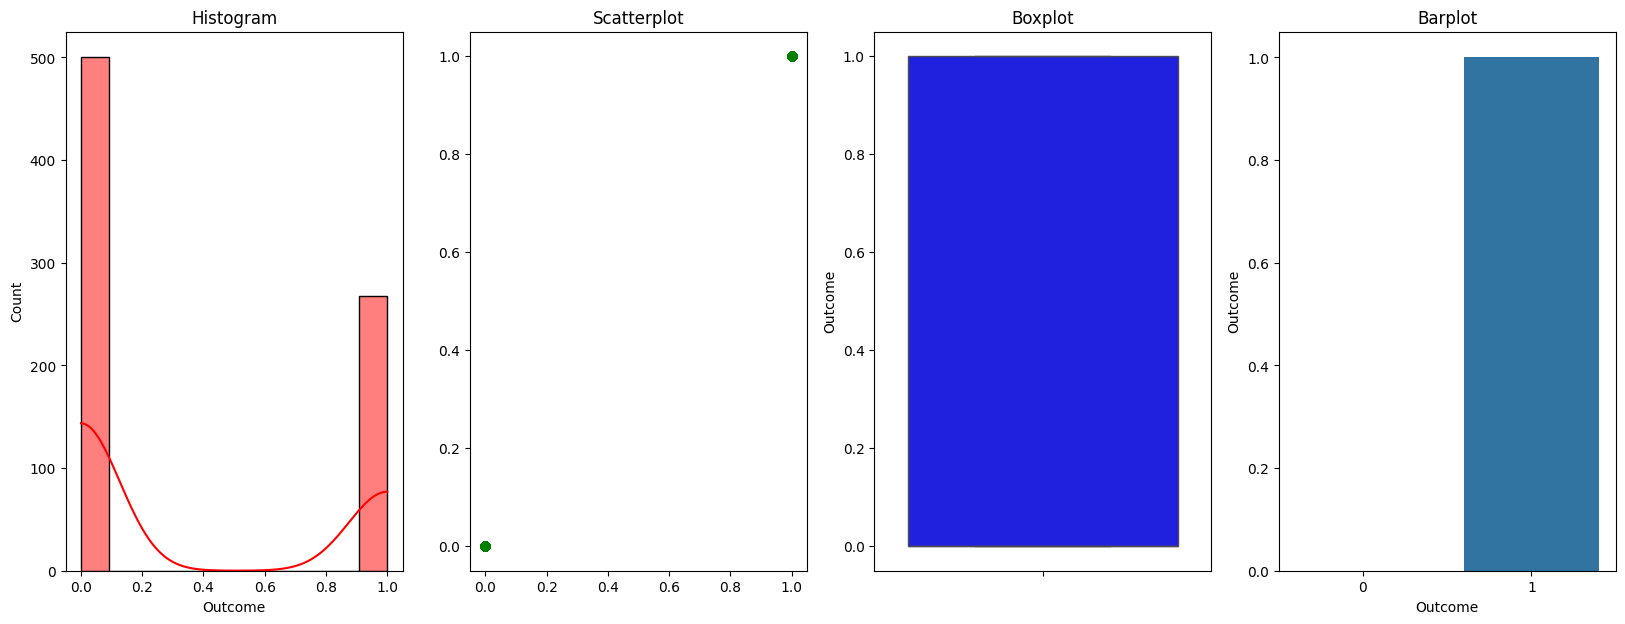

In [12]:
for col in df:
    diagnostic_plots(df,col,'Outcome')

In [13]:
# Getting zero and less than zero values counts in each column
# Glucose	BloodPressure	SkinThickness	Insulin	BMI
cols= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(df[df[col] <= 0])
    print("Number of zero or less tha zero values in column {} are {}".format(col,zero_values))

Number of zero or less tha zero values in column Glucose are 5
Number of zero or less tha zero values in column BloodPressure are 35
Number of zero or less tha zero values in column SkinThickness are 227
Number of zero or less tha zero values in column Insulin are 374
Number of zero or less tha zero values in column BMI are 11


In [14]:
cols= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    median = df[col].median()
    df.loc[df[col]<=0,col] = median

In [15]:
cols= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(df[df[col] <= 0])
    print("Number of zero or less tha zero values in column {} are {}".format(col,zero_values))

Number of zero or less tha zero values in column Glucose are 0
Number of zero or less tha zero values in column BloodPressure are 0
Number of zero or less tha zero values in column SkinThickness are 0
Number of zero or less tha zero values in column Insulin are 0
Number of zero or less tha zero values in column BMI are 0


In [16]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

In [17]:
df1 = mod_outlier(df)

C:\Users\neddy\AppData\Local\Temp\ipykernel_21276\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\neddy\AppData\Local\Temp\ipykernel_21276\926679308.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower_bound[col]
C:\Users\neddy\AppData\Local\Temp\ipykernel_21276\926679308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
C:\Users\n

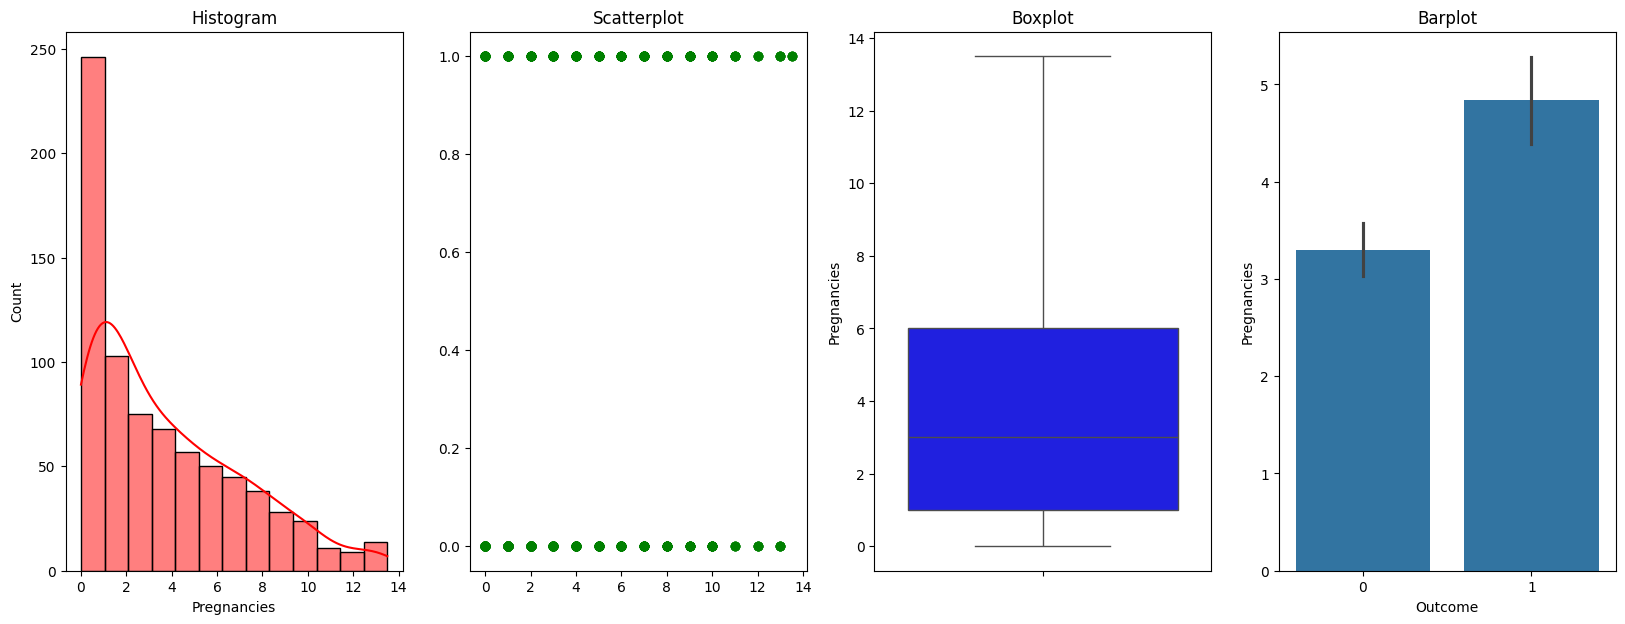

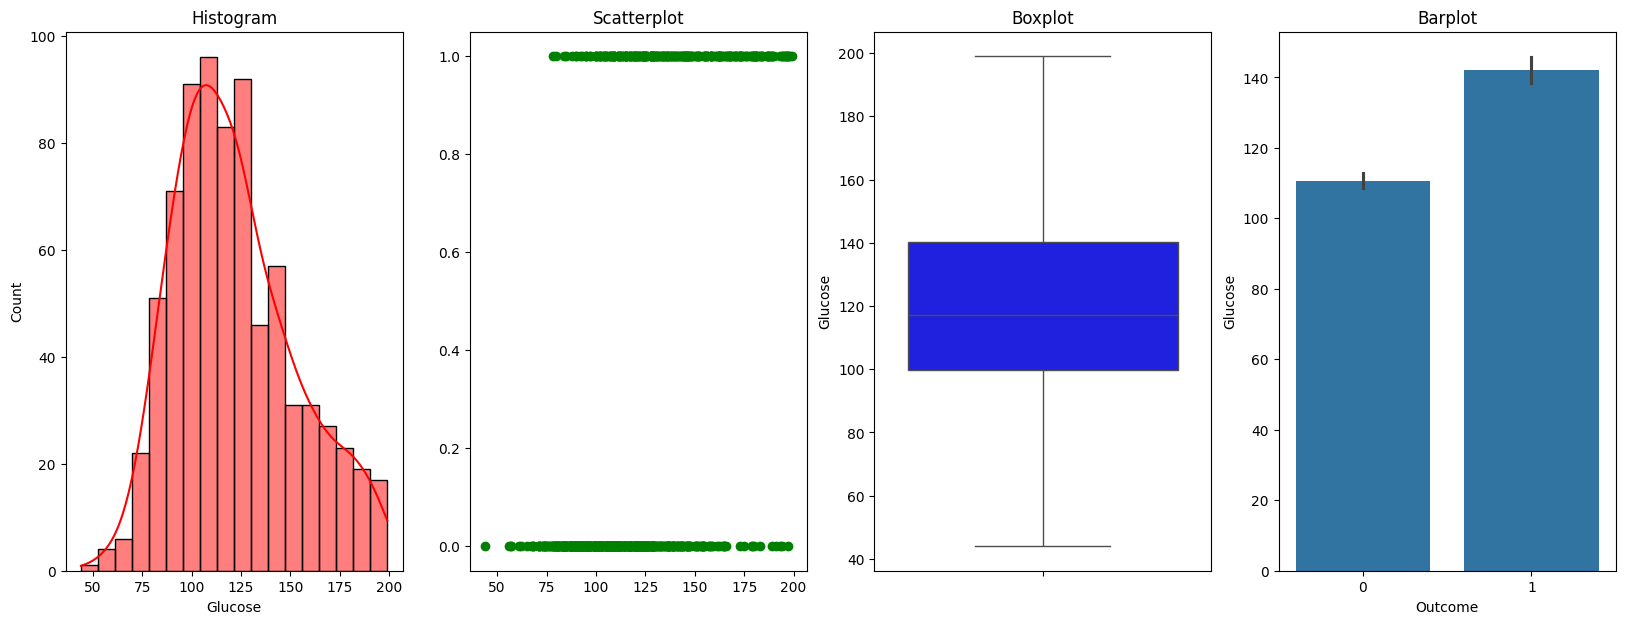

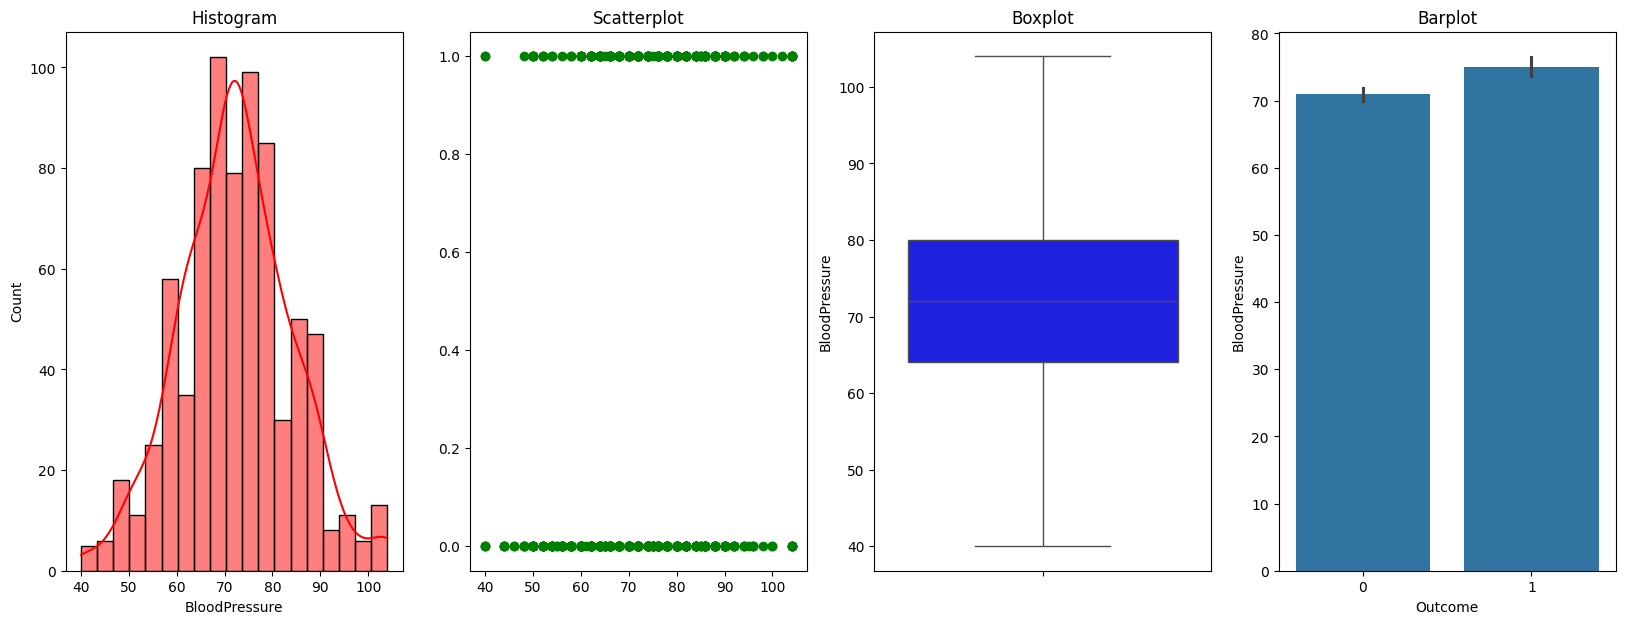

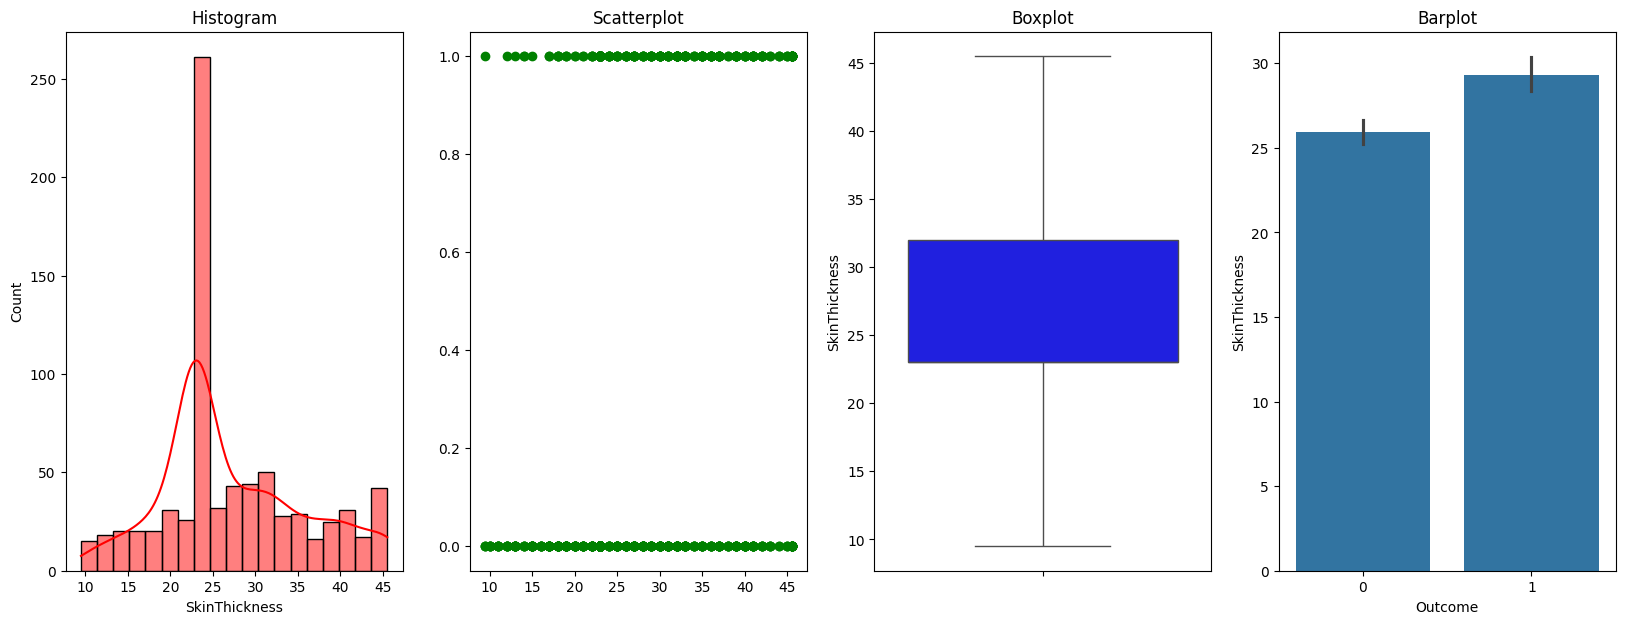

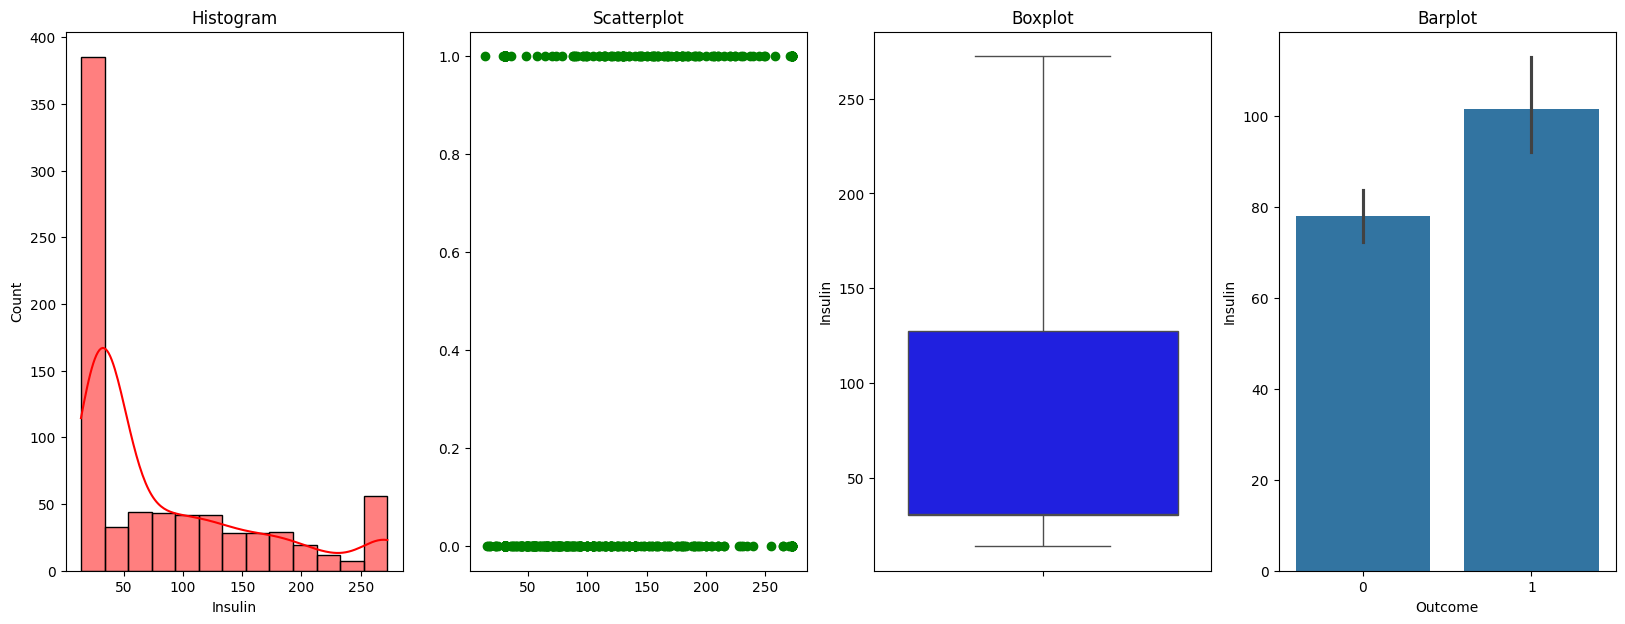

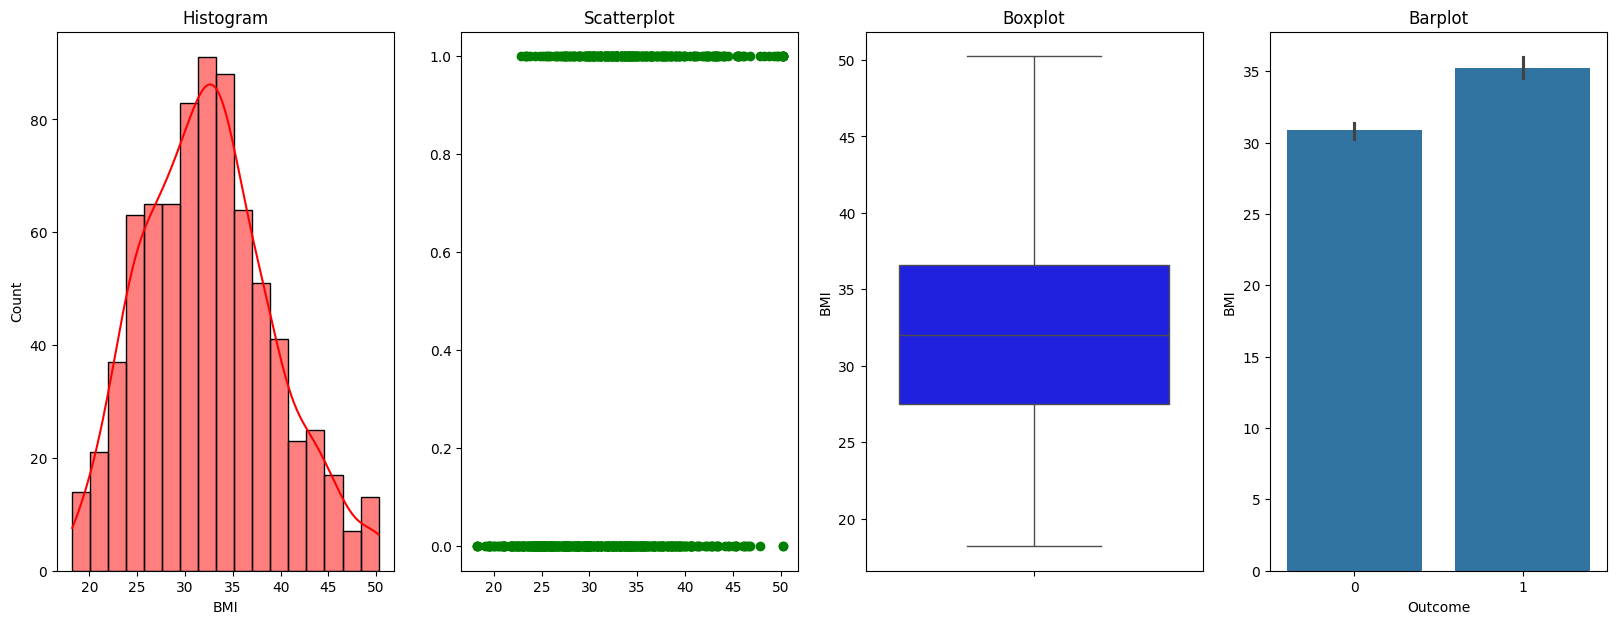

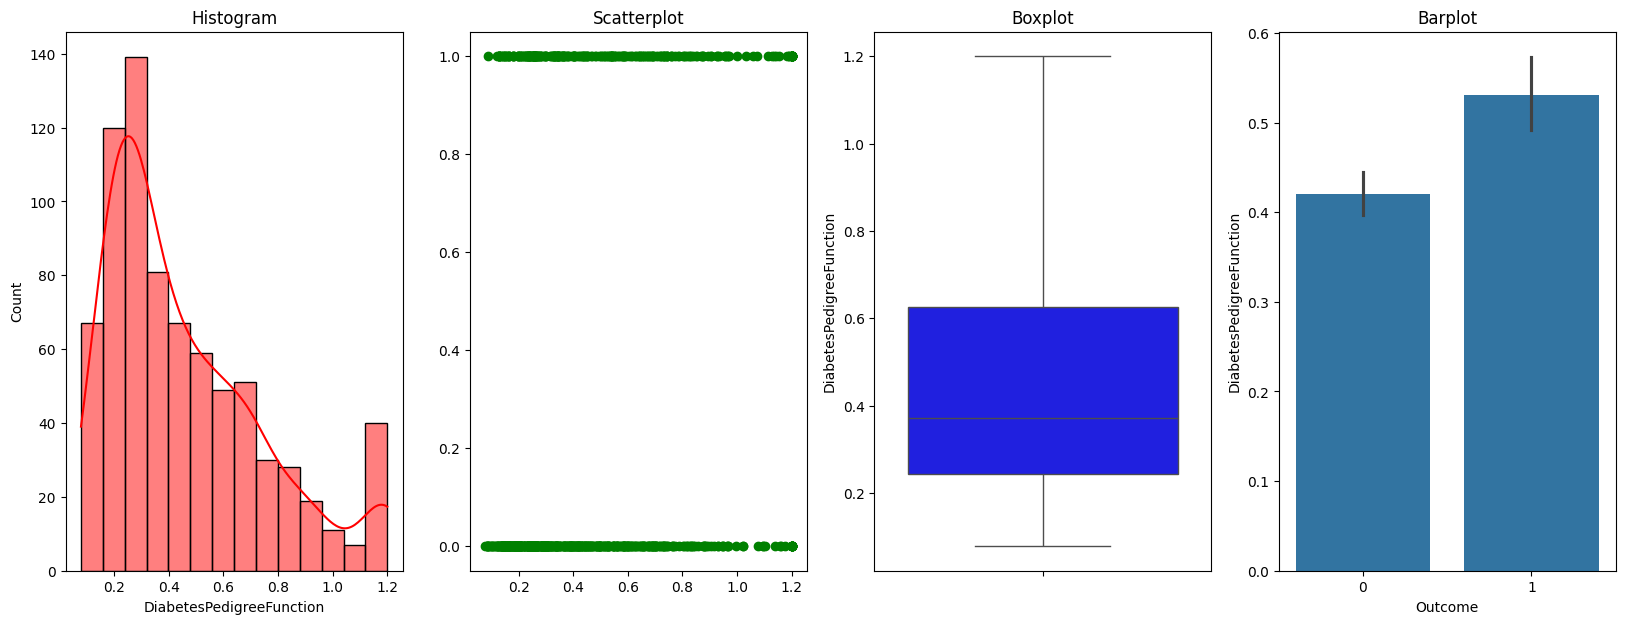

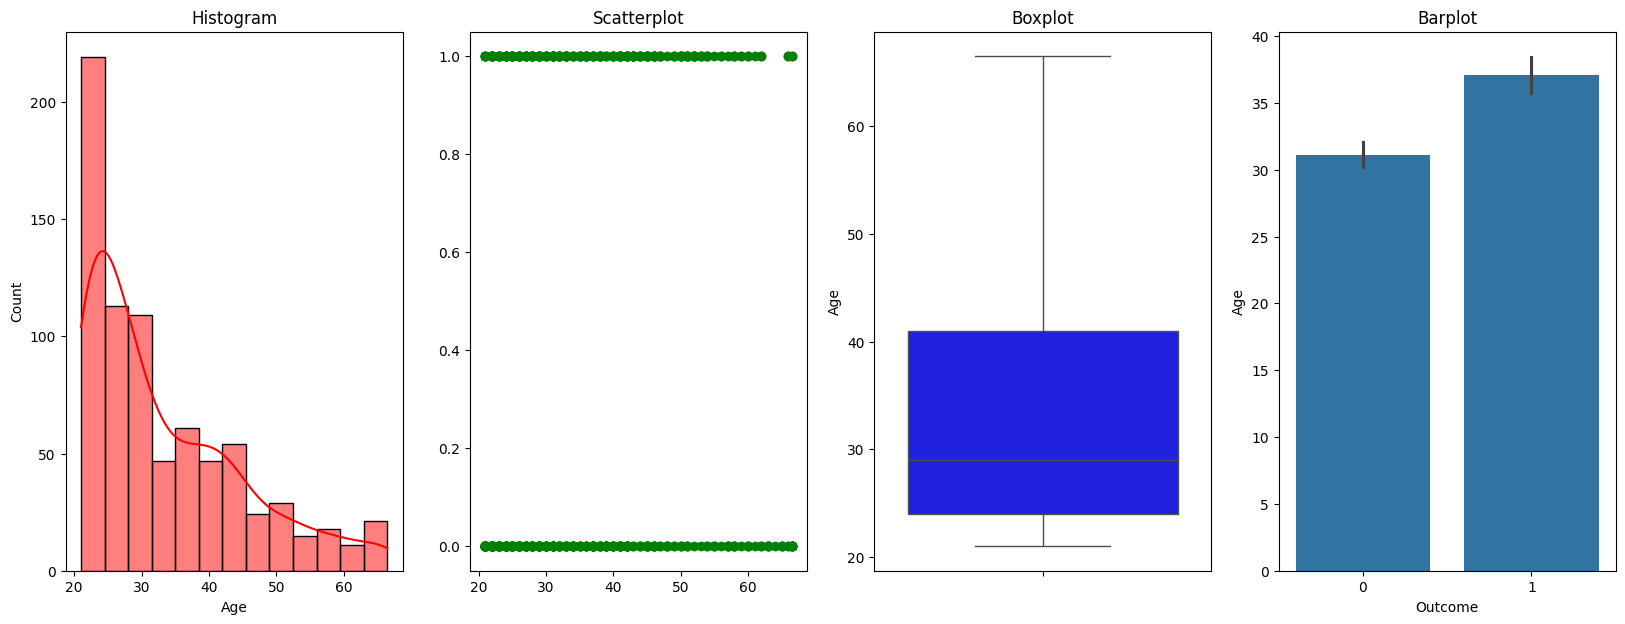

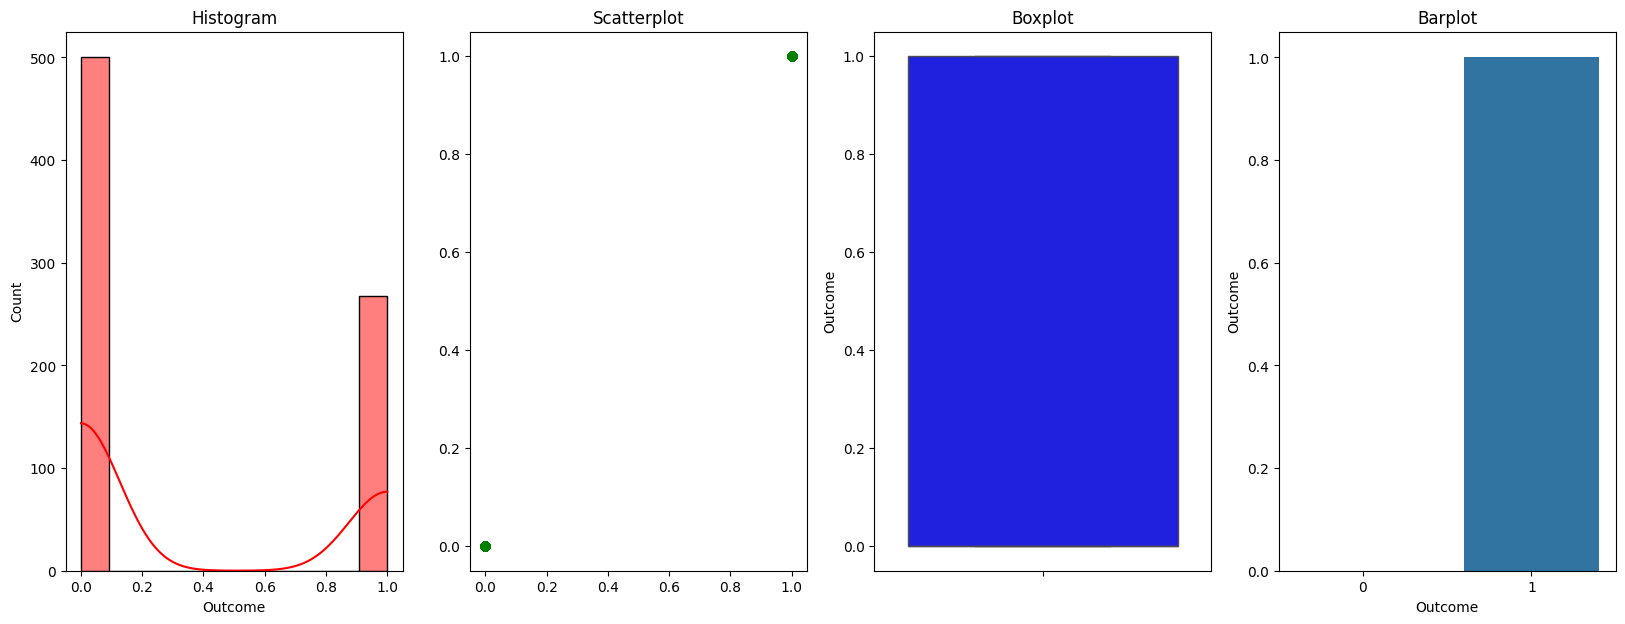

In [18]:
#아웃라이어 처리 후
for col in df1:
    diagnostic_plots(df1,col,'Outcome')

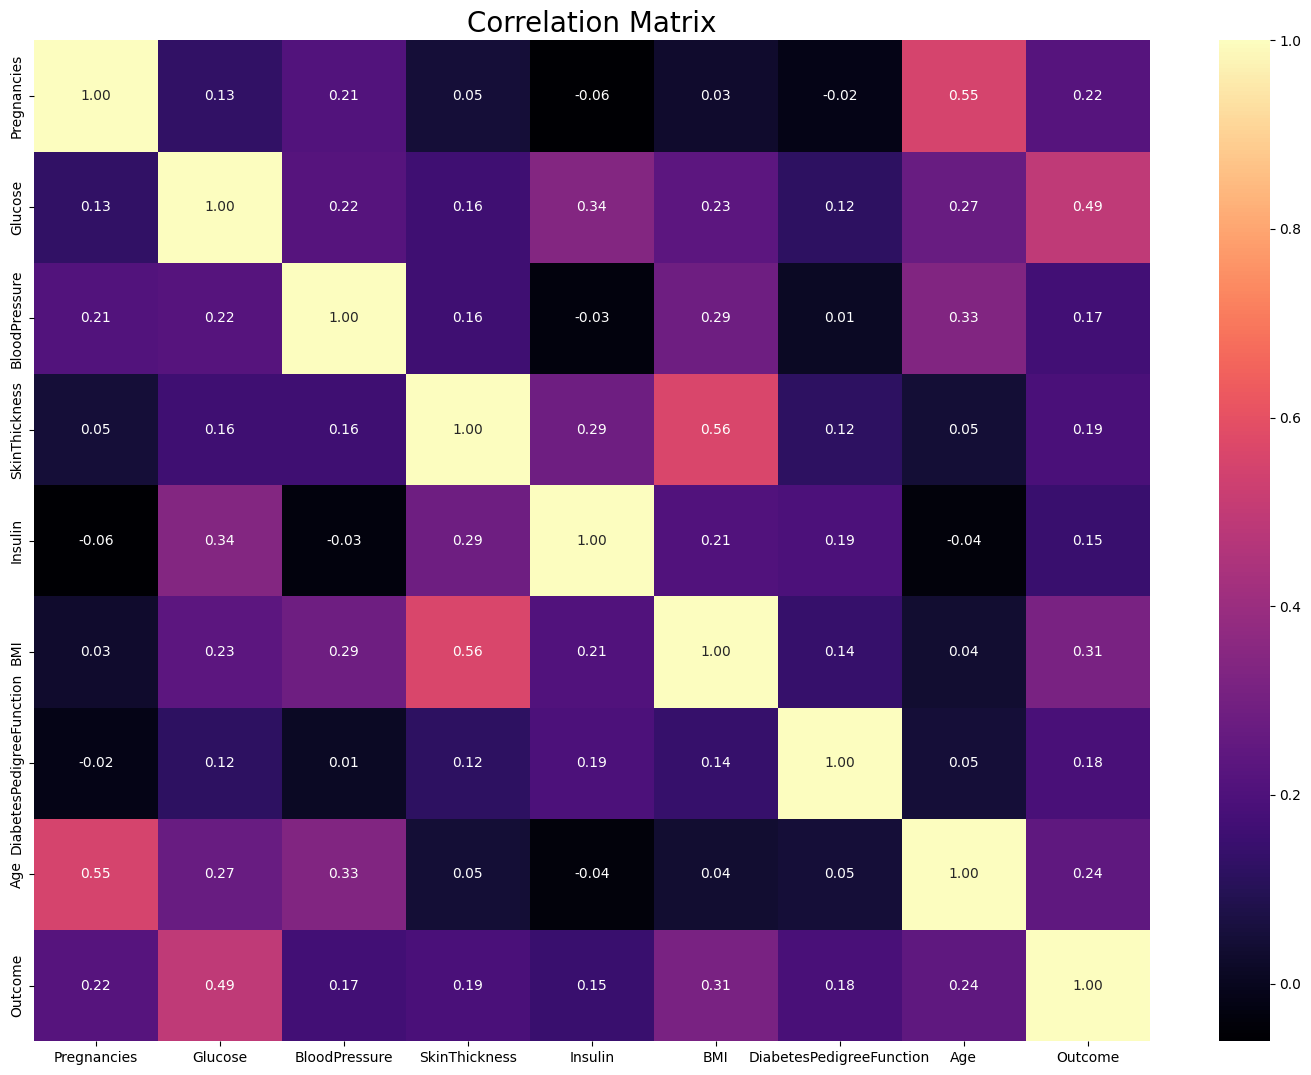

In [19]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [20]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,30.5,33.6,0.627,50.0,1
1,1.0,85,66,29.0,30.5,26.6,0.351,31.0,0
2,8.0,183,64,23.0,30.5,23.3,0.672,32.0,1
3,1.0,89,66,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,45.5,180.0,32.9,0.171,63.0,0
764,2.0,122,70,27.0,30.5,36.8,0.340,27.0,0
765,5.0,121,72,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126,60,23.0,30.5,30.1,0.349,47.0,1


In [21]:
X= df1[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = df1.Outcome

### 로지스틱회귀 준비

In [22]:
#트레인, 테스트 데이터 스플릿하기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (576, 8)
y_train shape: (576,)
X_test shape: (192, 8)
y_test shape: (192,)


In [23]:
from sklearn.preprocessing import MinMaxScaler

st = MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)


### 로지스틱 회귀 수행

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(max_iter = 100, multi_class = "ovr", penalty = "l1", solver = "saga")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("with solver saga score is : {}".format(score))

with solver saga score is : 0.75


### 굳이 multi_class를 설정할 이유 잘 모르겠으나 일단 원코드대로 넣음. 실행해봐도, 그리고 구글링해봐도 성능 향상이 있는 것 같진 않음

#### 코드 해설


**1)max_iter=100 :** 최적화 알고리즘의 최대 반복 횟수로, 여기서는 최대 100번 반복하도록 설정했습니다.

**2)multi_class="ovr" :** 다중 클래스 분류 방법을 지정합니다. "ovr"은 One-vs-Rest 방식으로, 각 클래스를 다른 모든 클래스와 구분하도록 분류합니다. 이 방법은 이진 분류기를 각 클래스마다 만들어서 분류하는 방식입니다.

&nbsp;&nbsp;&nbsp;&nbsp;-"ovr": One-vs-Rest. 각 클래스를 다른 모든 클래스와 비교하여 이진 분류기를 학습합니다.

&nbsp;&nbsp;&nbsp;&nbsp;-"multinomial": Softmax를 사용하여 다중 클래스 확률을 계산합니다.

**3)penalty="l1" :** 규제 유형을 지정합니다. "l1" 규제는 L1 규제를 의미하며, 회귀 계수의 절대값에 규제 항을 추가하여 모델의 복잡도를 줄이는 역할을 합니다.

**4)solver="saga" :** 최적화에 사용할 알고리즘을 지정합니다. "saga"는 Stochastic Average Gradient Descent의 약자로, 큰 데이터셋에 대해 효율적으로 작동하는 세련된 최적화 알고리즘입니다.

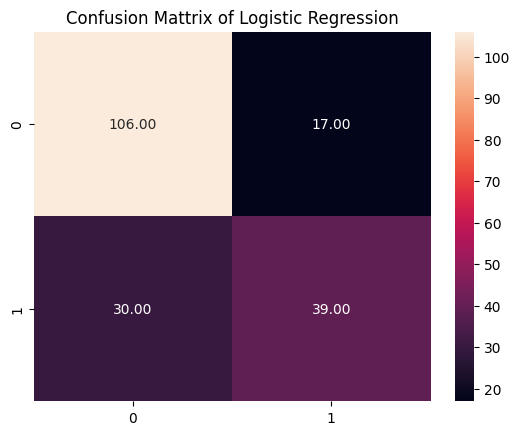

In [32]:
final_logreg_cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(final_logreg_cm, annot = True, fmt = '.2f')
plt.title("Confusion Mattrix of Logistic Regression")
plt.show()

#### 혼동행렬 : 성능 평가용 그래프. 왼쪽 위부터 시계방향으로 각각 TN, FP, TP, FN을 나타냄

참고 자료 :
https://bommbom.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1-%ED%9A%8C%EA%B7%80Logistic-Regression-%EC%84%A0%ED%98%95-vs-%EB%B9%84%EC%84%A0%ED%98%95

https://blog.naver.com/younjung1996/223377967499